In [22]:
pip install minisom


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10601 sha256=acf120dbfa765e6c75c7490e0aabf03c1cd949a6ea5812792c673bc05ea6ec4e
  Stored in directory: c:\users\bastian\appdata\local\pip\cache\wheels\c7\92\d2\33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [112]:
import numpy as np
import matplotlib.pylab as plt
import pickle
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from minisom import MiniSom
from sklearn.metrics import pairwise_distances_argmin_min,pairwise_distances,mean_squared_error



class KMedians(KMeans):
    def _e_step(self, X):
        self.labels_ = manhattan_distances(X, self.cluster_centers_).argmin(axis=1)

    def _average(self, X):
        return np.median(X, axis=0)

Importando el dataset

In [192]:
world_data, world_labels, world_labels_short, feature_name = pickle.load(open("world.p", "rb"))
N, M = world_data.shape


In [31]:
# Parte 1: Según geografía y población
subset = [0, 1, 2, 3]
# Parte 2: Según desarrollo económico
#subset = [4, 5, 6, 7]
# Parte 3: Según desarrollo tecnológico
#subset = [8, 9, 10, 11, 12, 13]
# Parte 4: Según calidad de vida y educación
#subset = [15, 16, 17, 18, 19, 20]
# Parte 5: Todas
#subset = np.arange(M)
# Normalizar datos
world_data_scaled = scale(world_data[:, subset], axis=0, with_mean=False, with_std=True)


c:\Users\bastian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering usando kmedians

i) Construya un mapa auto-organizativo de Kohonen (SOM), visualice los resultados usando la matriz-U
de distancias y los mapas de prototipos para cada característica.


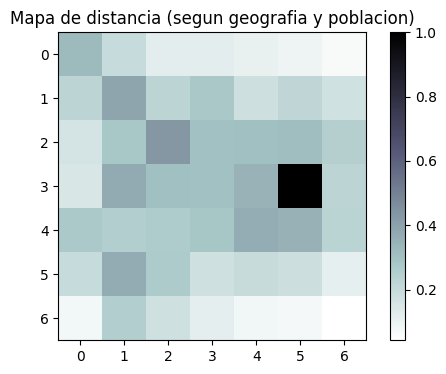

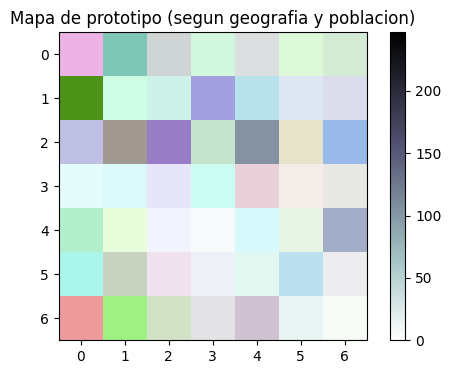

In [87]:
subset = [0, 1, 2, 3]
world_data_scaled = scale(world_data[:, subset], axis=0, with_mean=False, with_std=True)
som = MiniSom(7,7,4, sigma=1.0, learning_rate=0.5)    
som.random_weights_init(world_data_scaled) 
som.train_random(world_data_scaled, 100)
u_matrix = som.distance_map()
plt.figure(figsize=(6,4))
plt.imshow(u_matrix, cmap='bone_r')
plt.title('Mapa de distancia (segun geografia y poblacion)')
plt.colorbar()
plt.show()


prototype_maps = som.get_weights()
plt.figure(figsize=(6,4))
plt.imshow((prototype_maps * 255).astype(np.uint8), cmap='bone_r')
# warning = Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)
# solucion= plt.imshow((out * 255).astype(np.uint8))
plt.title('Mapa de prototipo (segun geografia y poblacion)')
plt.colorbar()
plt.show()

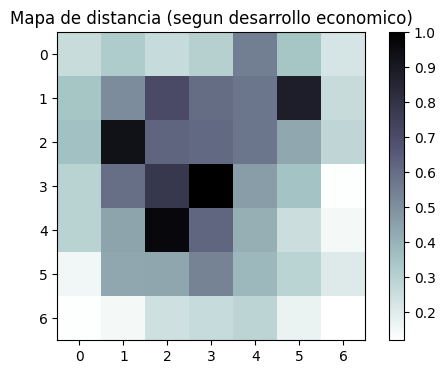

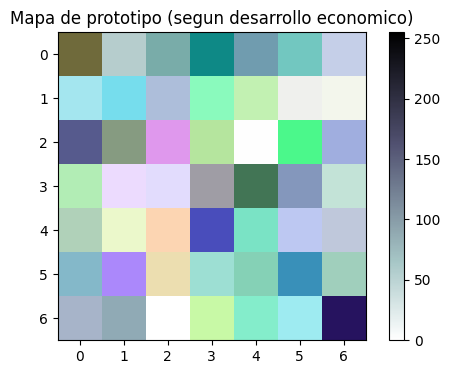

In [88]:
subset = [4, 5, 6, 7]
world_data_scaled = scale(world_data[:, subset], axis=0, with_mean=False, with_std=True)
som = MiniSom(7,7,4, sigma=1.0, learning_rate=0.5)    
som.random_weights_init(world_data_scaled) 
som.train_random(world_data_scaled, 100)
u_matrix = som.distance_map()
plt.figure(figsize=(6,4))
plt.imshow(u_matrix, cmap='bone_r')
plt.title('Mapa de distancia (segun desarrollo economico)')
plt.colorbar()
plt.show()


prototype_maps = som.get_weights()
plt.figure(figsize=(6,4))
plt.imshow((prototype_maps * 255).astype(np.uint8), cmap='bone_r')
# warning = Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)
# solucion= plt.imshow((out * 255).astype(np.uint8))
plt.title('Mapa de prototipo (segun desarrollo economico)')
plt.colorbar()
plt.show()

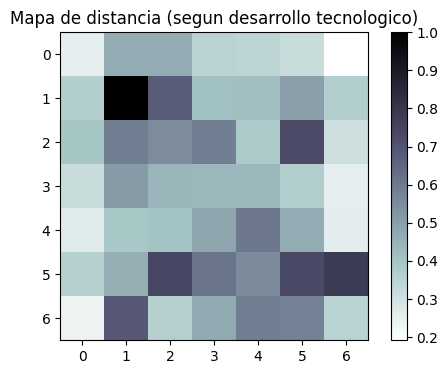

In [98]:
subset = [8, 9, 10, 11, 12, 13]
world_data_scaled = scale(world_data[:, subset], axis=0, with_mean=False, with_std=True)
som = MiniSom(7,7,6, sigma=1.0, learning_rate=0.5)    
som.random_weights_init(world_data_scaled) 
som.train_random(world_data_scaled, 100)
u_matrix = som.distance_map()
plt.figure(figsize=(6,4))
plt.imshow(u_matrix, cmap='bone_r')
plt.title('Mapa de distancia (segun desarrollo tecnologico)')
plt.colorbar()
plt.show()

#pca = PCA(n_components=6)
#world_data_projected = pca.fit_transform(world_data_scaled)
#som = MiniSom(7,7,6, sigma=1.0, learning_rate=0.5)  
#som.random_weights_init(world_data_projected) 
#som.train_random(world_data_projected, 100)
#prototype_maps = som.get_weights()
#plt.figure(figsize=(6,4))
#plt.imshow(prototype_maps , cmap='bone_r')
# warning = Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)
# solucion= plt.imshow((out * 255).astype(np.uint8))
#plt.title('Mapa de prototipo (segun desarrollo tecnologico)')
#plt.colorbar()
#plt.show()

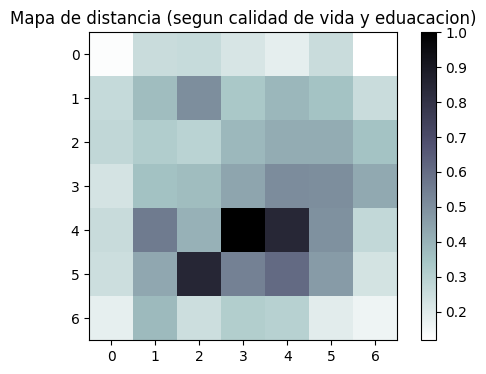

In [102]:
subset = [15, 16, 17, 18, 19, 20]
world_data_scaled = scale(world_data[:, subset], axis=0, with_mean=False, with_std=True)
som = MiniSom(7,7,6, sigma=1.0, learning_rate=0.5)    
som.random_weights_init(world_data_scaled) 
som.train_random(world_data_scaled, 100)
u_matrix = som.distance_map()
plt.figure(figsize=(6,4))
plt.imshow(u_matrix, cmap='bone_r')
plt.title('Mapa de distancia (segun calidad de vida y eduacacion)')
plt.colorbar()
plt.show()


2) Construya una proyección de los datos en 2D usando el algoritmo TSNE

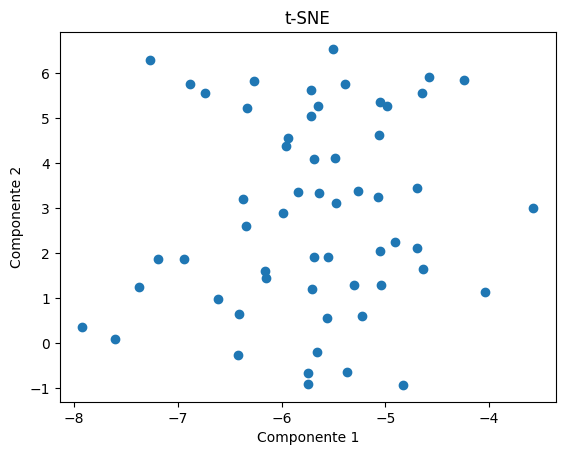

In [104]:
subsetall = np.arange(M)
world_data_scaled = scale(world_data[:, subsetall], axis=0, with_mean=False, with_std=True)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(world_data_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('t-SNE')
plt.show()

proyeccion con pca

Identique y describa los grupos de similitud o clusters entre los países. Estime el número de clusters. ¾Se
observan outliers? Complemente su análisis con la información obtenida de la proyección en componentes
principales y el clustering de k-medianas (usando el número estimado de clusters)

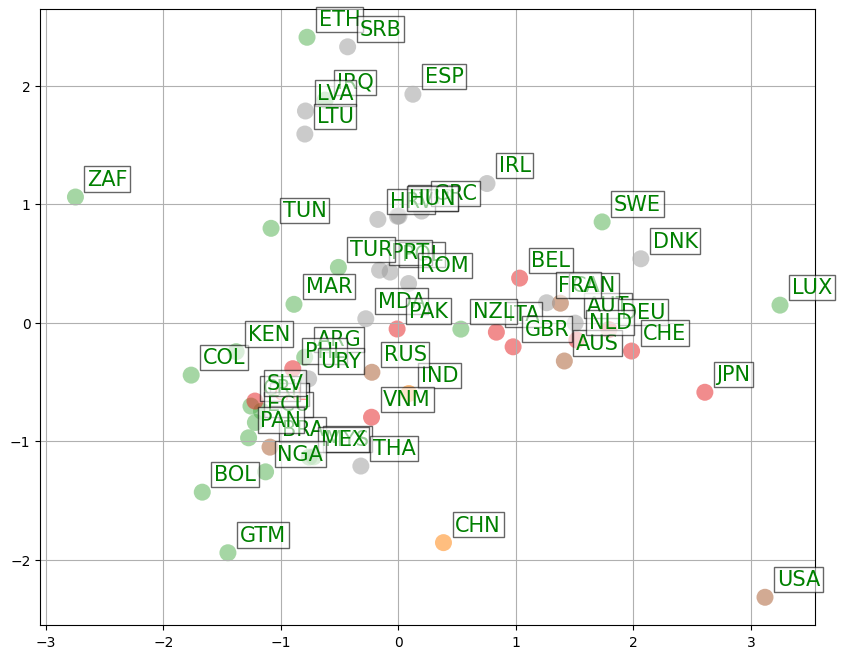

In [159]:
america_sur = ["ARG","BOL","BRA","COL","ECU"]
subset = [4, 5, 6, 7]
world_data_scaled = scale(world_data[:, subset], axis=0, with_mean=False, with_std=True)

pca = PCA(n_components=2)
world_data_projected = pca.fit_transform(world_data_scaled)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(world_data_projected[:, 0], world_data_projected[:, 1],
           c=pred_labels/clustering.n_clusters, linewidth=0, alpha=0.5, s=150, cmap='Set1')
for i in range(N):
    if world_labels_short[i] == "CHL":
        ax.annotate(world_labels_short[i],
                    xy=(world_data_projected[i, 0]+0.1, world_data_projected[i, 1]+0.1), fontsize=12, color='r',
                   bbox={'facecolor':'white', 'alpha':0.8, 'pad':2})
    else:
        ax.annotate(world_labels_short[i],
                    xy=(world_data_projected[i, 0]+0.1, world_data_projected[i, 1]+0.1), fontsize=15, color='g',
                   bbox={'facecolor':'white', 'alpha':0.6, 'pad':2})
plt.grid()
plt.show()

In [123]:
def estimate_k_medians(data, min_clusters, max_clusters):
    best_k = None
    best_variances_sum = np.inf

    for k in range(min_clusters, max_clusters + 1):
        # Escalar los datos
        scaled_data = scale(data)

        # Aplicar k-medians
        medians, labels = k_medians(scaled_data, k)

        # Calcular la suma de las varianzas de cada grupo
        variances_sum = calculate_variances_sum(scaled_data, medians, labels)

        # Actualizar el número óptimo de clusters
        if variances_sum < best_variances_sum:
            best_k = k
            best_variances_sum = variances_sum

    return best_k

def k_medians(data, k, max_iterations=100):
    # Inicializar centroides aleatorios
    random_indices = np.random.choice(len(data), k, replace=False)
    medians = data[random_indices]

    for _ in range(max_iterations):
        # Asignar cada muestra al centroide más cercano
        labels = pairwise_distances_argmin_min(data, medians, metric='manhattan')[0]

        # Calcular nuevos centroides utilizando la mediana de cada grupo
        new_medians = np.zeros_like(medians)
        for i in range(k):
            group = data[labels == i]
            new_medians[i] = np.median(group, axis=0)

        # Verificar convergencia
        if np.all(medians == new_medians):
            break

        medians = new_medians

    return medians, labels

def calculate_variances_sum(data, medians, labels):
    variances_sum = 0
    for i, median in enumerate(medians):
        group = data[labels == i]
        variances_sum += np.sum((group - median) ** 2)

    return variances_sum

subsetall = np.arange(M)
world_data_scaled = scale(world_data[:, subsetall], axis=0, with_mean=False, with_std=True)
min_clusters = 2
max_clusters = 10

optimal_k = estimate_k_medians(world_data_scaled, min_clusters, max_clusters)
print("Número óptimo de clusters:", optimal_k)


Número óptimo de clusters: 9


c:\Users\bastian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


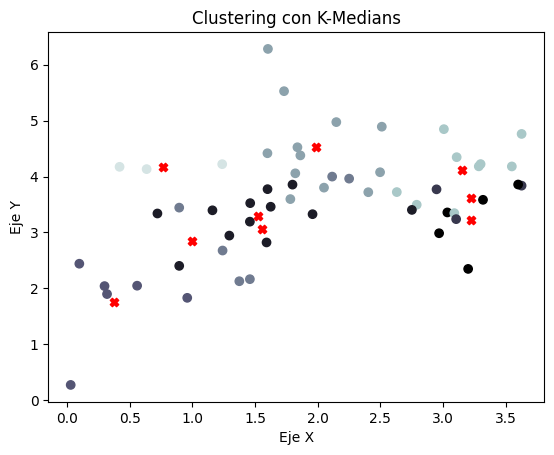

In [195]:
#subset = np.arange(M)
subset = [8, 9, 10, 11, 12, 13]
world_data_scaled = scale(world_data[:, subset], axis=0, with_mean=False, with_std=True)

clustering = KMedians(n_clusters=9)
clustering.fit(world_data_scaled)
centroids = clustering.cluster_centers_
labels = clustering.labels_


# Visualizar los resultados
plt.scatter(world_data_scaled[:, 0], world_data_scaled[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.title('Clustering con K-Medians')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

In [193]:
subset = [0, 1, 2, 3]
world_data_scaled = scale(world_data[:, subset], axis=0, with_mean=False, with_std=True)

# Realizar el clustering con K-Medians y obtener los resultados
clustering = KMedians(n_clusters=9)
clustering.fit(world_data_scaled)
labels = clustering.labels_

# Identificar los países de América del Sur y el clúster al que pertenecen
south_american_countries = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Paraguay", "Peru", "Uruguay", "Venezuela"]
south_american_cluster = None

for country_idx, country_label in enumerate(world_labels):
    if country_label in south_american_countries:
        south_american_cluster = labels[country_idx]
        break

# Comentar sobre la relación particular de Chile con respecto a otros países de América del Sur y del mundo
for country_idx, country_label in enumerate(world_labels):
    if country_label == "Chile":
        chile_cluster = labels[country_idx]
        if chile_cluster == south_american_cluster:
            print(f"Chile se encuentra en el mismo clúster que otros países de América del Sur.")
        else:
            print(f"Chile se encuentra en un clúster diferente a otros países de América del Sur.")
        break

# Comprobar si hay otros países en el mismo clúster que Chile
countries_same_cluster = [country_label for country_idx, country_label in enumerate(world_labels) if labels[country_idx] == chile_cluster]
print(f"Países en el mismo clúster que Chile: {countries_same_cluster}")


Chile se encuentra en el mismo clúster que otros países de América del Sur.
Países en el mismo clúster que Chile: ['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'Malaysia', 'Mexico', 'Morocco', 'New Zealand', 'Panama', 'South Africa', 'Sweden', 'Tunisia', 'Turkey']


c:\Users\bastian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
